In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-detection/no/no26.jpg
/kaggle/input/brain-tumor-detection/no/no979.jpg
/kaggle/input/brain-tumor-detection/no/no598.jpg
/kaggle/input/brain-tumor-detection/no/no141.jpg
/kaggle/input/brain-tumor-detection/no/no715.jpg
/kaggle/input/brain-tumor-detection/no/no122.jpg
/kaggle/input/brain-tumor-detection/no/no457.jpg
/kaggle/input/brain-tumor-detection/no/no895.jpg
/kaggle/input/brain-tumor-detection/no/no446.jpg
/kaggle/input/brain-tumor-detection/no/no395.jpg
/kaggle/input/brain-tumor-detection/no/no89.jpg
/kaggle/input/brain-tumor-detection/no/no632.jpg
/kaggle/input/brain-tumor-detection/no/no420.jpg
/kaggle/input/brain-tumor-detection/no/no634.jpg
/kaggle/input/brain-tumor-detection/no/no1142.jpg
/kaggle/input/brain-tumor-detection/no/no473.jpg
/kaggle/input/brain-tumor-detection/no/no1244.jpg
/kaggle/input/brain-tumor-detection/no/no474.jpg
/kaggle/input/brain-tumor-detection/no/no706.jpg
/kaggle/input/brain-tumor-detection/no/no161.jpg
/kaggle/input/brain-

## 1. Importing

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

## 2. Preprocessing 

In [3]:
# Get the path of files
image_directory='../input/brain-tumor-detection/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
# initialize dataset and label arrays
dataset=[]
label=[]
# set input size
INPUT_SIZE=64

In [4]:
#loop over each image in each category
for i , image_name in enumerate(no_tumor_images):
    #read the image if its extension is .jpg
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        #resize the image
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        #append image arry in dataset list and its label in label list
        dataset.append(np.array(image))
        label.append(0)
# same for yes images
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)


In [5]:
no_tumor_images[1]

'no979.jpg'

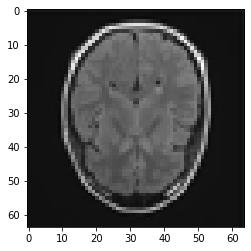

In [6]:
plt.imshow(dataset[21])

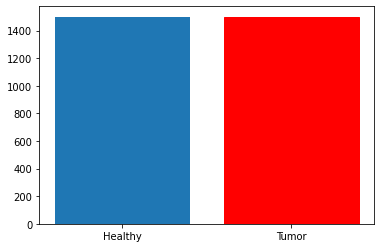

In [7]:
from collections import Counter 
# counts the number of occures of each label and save them in a dictionary
c = Counter(label)
#rename the keys and delete the old one
c["Healthy"] = c[0]
del c[0]
c['Tumor'] = c[1]
del c[1]
#plot each key and value in c 
plot=plt.bar(c.keys(), c.values())
plot[1].set_color('r')

plt.savefig('DataDistribution.png')

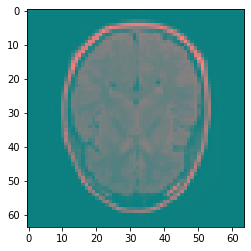

In [8]:
# convert RGB image to LAB
Healthy_image = cv2.cvtColor(dataset[21],cv2.COLOR_BGR2LAB)
# get LAB
l,a,b = cv2.split(Healthy_image)
plt.imshow(Healthy_image)
plt.show()

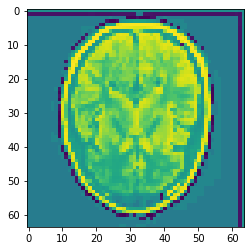

In [9]:
# apply equalization histogram to perceptual lightness (L)
equ1= cv2.equalizeHist(l)
plt.imshow(equ1)
plt.show()

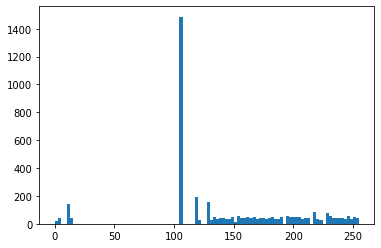

In [10]:
# plot equalization hist
plt.hist(equ1.flat, bins=100, range=(0,255))
plt.show()

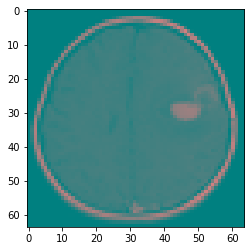

In [11]:
Tumor = cv2.cvtColor(dataset[2000],cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(Tumor)
plt.imshow(Tumor)
plt.show()

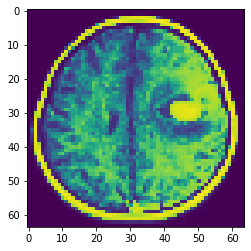

In [12]:
equ = cv2.equalizeHist(l)
plt.imshow(equ)
plt.show()

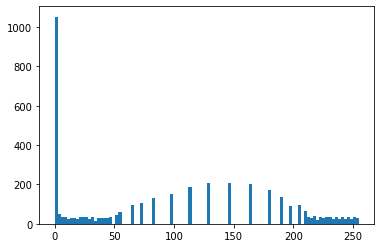

In [13]:
plt.hist(equ.flat, bins=100, range=(0,255))
plt.show()

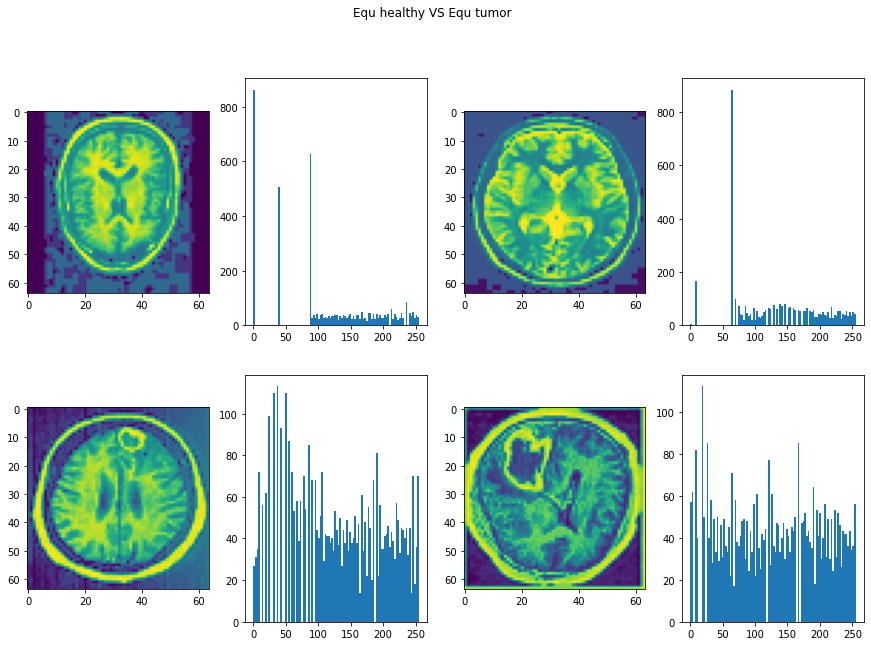

<Figure size 432x288 with 0 Axes>

In [14]:
# Initialise the subplots using number of rows and columns
figure, axis = plt.subplots(2, 4)
#custom layout
figure.set_figheight(10)
figure.set_figwidth(15)

def ploty (row,col,idx):
    
    """
    Function takes the row, col of figure, idx of image 
    to plot LAB image, its hist of l
    """
   
    
    img = cv2.cvtColor(dataset[idx],cv2.COLOR_BGR2LAB)
    b,g,r = cv2.split(img)
    equ = cv2.equalizeHist(b)
    axis[row,col].imshow(equ)
        
    axis[row,col+1].hist(equ.flat, bins=100, range=(0,255))
# image from first half (not affected)
ploty(0,0,200)
# image from second (affected)
ploty(1,0,2200)
ploty(0,2,600)
ploty(1,2,2600)
figure.suptitle("Equ healthy VS Equ tumor")
plt.show()
plt.savefig('equ.png')

In [15]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

In [16]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

## 3. Building the model

In [17]:
model=Sequential()
# 1st conv2D layer
model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd conv2D layer
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd conv2D layer
model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

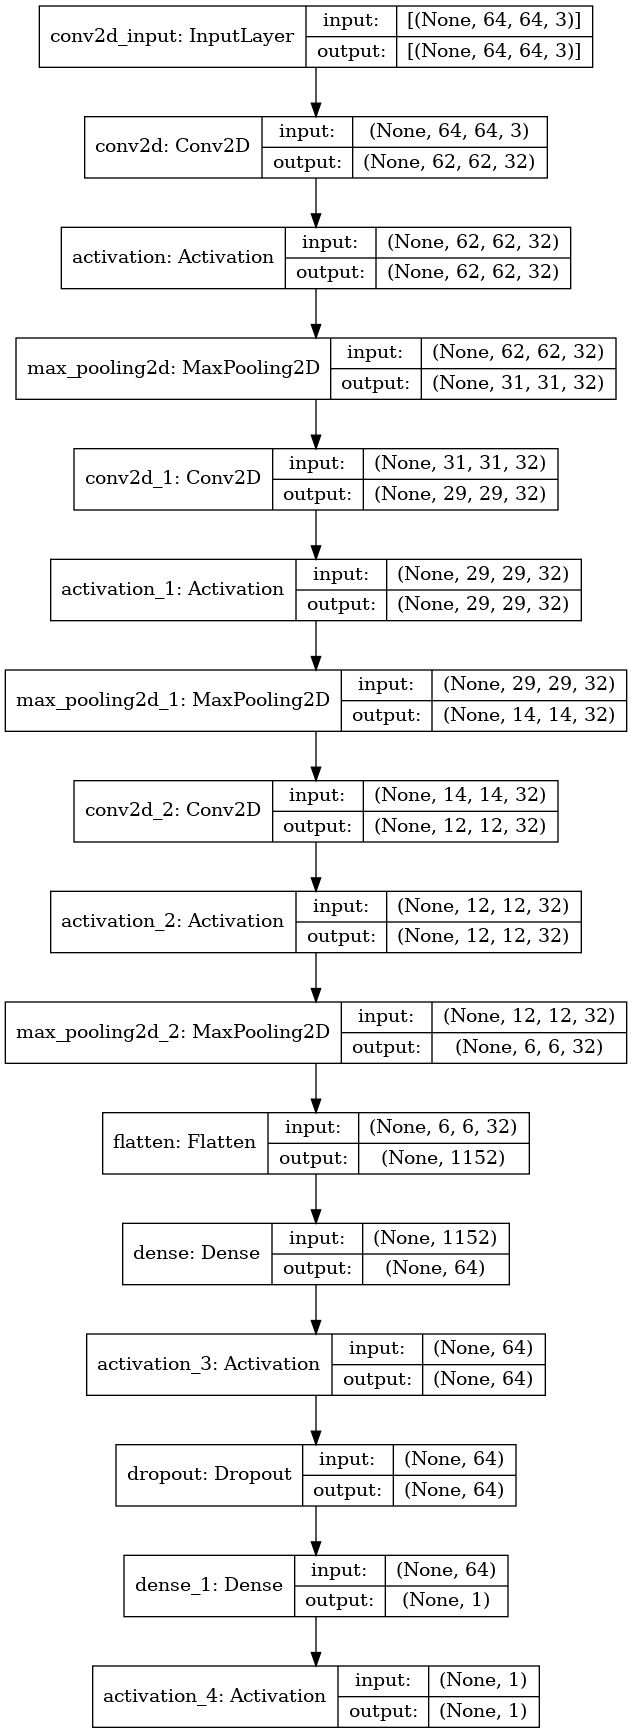

In [18]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

In [19]:
def tr_plot(tr_data, start_epoch):
    #Plot the loss and accuracy curve
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout

    plt.show()


2021-12-14 17:37:39.222373: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/17
150/150 [==============================] - 5s 26ms/step - loss: 0.5567 - accuracy: 0.7225 - val_loss: 0.4950 - val_accuracy: 0.7517
Epoch 2/17
150/150 [==============================] - 4s 24ms/step - loss: 0.4390 - accuracy: 0.8050 - val_loss: 0.3814 - val_accuracy: 0.8217
Epoch 3/17
150/150 [==============================] - 4s 23ms/step - loss: 0.3614 - accuracy: 0.8438 - val_loss: 0.3094 - val_accuracy: 0.8567
Epoch 4/17
150/150 [==============================] - 4s 24ms/step - loss: 0.2748 - accuracy: 0.8875 - val_loss: 0.2358 - val_accuracy: 0.9133
Epoch 5/17
150/150 [==============================] - 4s 24ms/step - loss: 0.2083 - accuracy: 0.9171 - val_loss: 0.1985 - val_accuracy: 0.9383
Epoch 6/17
150/150 [==============================] - 4s 24ms/step - loss: 0.1485 - accuracy: 0.9521 - val_loss: 0.1500 - val_accuracy: 0.9583
Epoch 7/17
150/150 [==============================] - 4s 28ms/step - loss: 0.1042 - accuracy: 0.9683 - val_loss: 0.1283 - val_accuracy: 0.9567

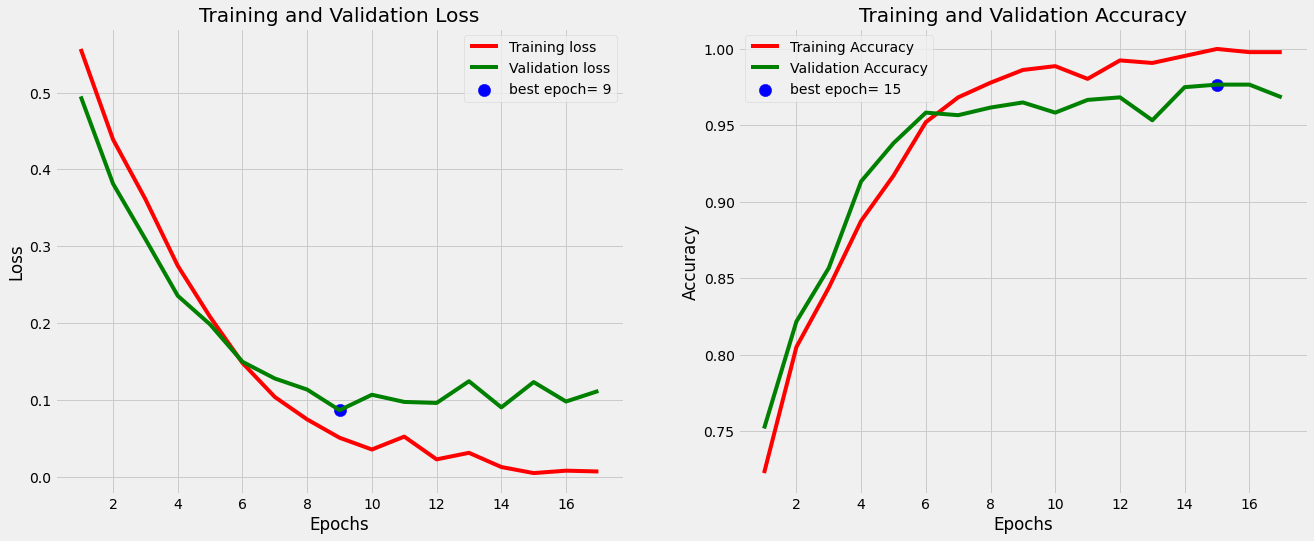

<Figure size 432x288 with 0 Axes>

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=16,verbose=1,epochs=17
          , validation_data=(x_test,y_test),
          shuffle=False)
# plot the history
tr_plot(history,0)
plt.savefig('history.png')
model.save('BrainTumor.h5')